# 3.1 Data Import

### Loading Data

In [1]:
!pip install xlrd

In [2]:
import pandas as pd
import numpy as np

mrfei = pd.read_excel("hciretailfoodenvironment.xlsx")
mrfei

ind_id                          ind_definition  reportyear  \
0         75  Modified retail food environment index        2017   
1         75  Modified retail food environment index        2017   
2         75  Modified retail food environment index        2017   
3         75  Modified retail food environment index        2017   
4         75  Modified retail food environment index        2017   
...      ...                                     ...         ...   
9648      75  Modified retail food environment index        2017   
9649      75  Modified retail food environment index        2017   
9650      75  Modified retail food environment index        2017   
9651      75  Modified retail food environment index        2017   
9652      75  Modified retail food environment index        2017   

      race_eth_code race_eth_name geotype  geotypevalue              geoname  \
0                 9         Total      CA             6           California   
1                 9         Total      CO          6001              Alameda   
2                 9         Total      CO          6003               Alpine   
3                 9         Total      CO          6005               Amador   
4                 9         Total      CO          6007                Butte   
...             ...           ...     ...           ...                  ...   
9648              9         Total      RE            10   San Joaquin Valley   
9649              9         Total      RE            11      San Luis Obispo   
9650              9         Total      RE            12        Santa Barbara   
9651              9         Total      RE            13               Shasta   
9652              9         Total      RE            14  Southern California   

     county_name  county_fips  ... numerator  denominator   estimate  \
0            NaN          NaN  ...    9530.0      53275.0  17.888315   
1        Alameda       6001.0  ...     424.0       2299.0  18.442801   
2         Alpine       6003.0  ...       0.0          2.0   0.000000   
3         Amador       6005.0  ...      14.0         59.0  23.728814   
4          Butte       6007.0  ...      65.0        308.0  21.103896   
...          ...          ...  ...       ...          ...        ...   
9648         NaN          NaN  ...    1353.0       5804.0  23.311509   
9649         NaN          NaN  ...      78.0        486.0  16.049383   
9650         NaN          NaN  ...     130.0        616.0  21.103896   
9651         NaN          NaN  ...      54.0        292.0  18.493151   
9652         NaN          NaN  ...    4220.0      25382.0  16.625955   

        ll_95ci    ul_95ci        se        rse  ca_decile     ca_rr  \
0     17.562867  18.213763  0.166045   0.928231        NaN  1.000000   
1     16.857429  20.028173  0.808863   4.385794        NaN  1.030997   
2      0.000000   0.000000  0.000000        NaN        NaN  0.000000   
3     12.873351  34.584276  5.538501  23.340827        NaN  1.326498   
4     16.546783  25.661009  2.325058  11.017197        NaN  1.179759   
...         ...        ...       ...        ...        ...       ...   
9648  22.223725  24.399293  0.554992   2.380763        NaN  1.303170   
9649  12.785917  19.312848  1.665034  10.374440        NaN  0.897199   
9650  17.881530  24.326262  1.644064   7.790334        NaN  1.179759   
9651  14.040002  22.946299  2.272014  12.285708        NaN  1.033812   
9652  16.167917  17.083994  0.233693   1.405592        NaN  0.929431   

                 version  
0    2017-11-15 16:52:07  
1    2017-11-15 16:52:07  
2    2017-11-15 16:52:07  
3    2017-11-15 16:52:07  
4    2017-11-15 16:52:07  
...                  ...  
9648 2017-11-15 16:52:07  
9649 2017-11-15 16:52:07  
9650 2017-11-15 16:52:07  
9651 2017-11-15 16:52:07  
9652 2017-11-15 16:52:07  

[9653 rows x 26 columns]

# 3.2 Data Cleaning

## Visualization Missing Value

<AxesSubplot:>

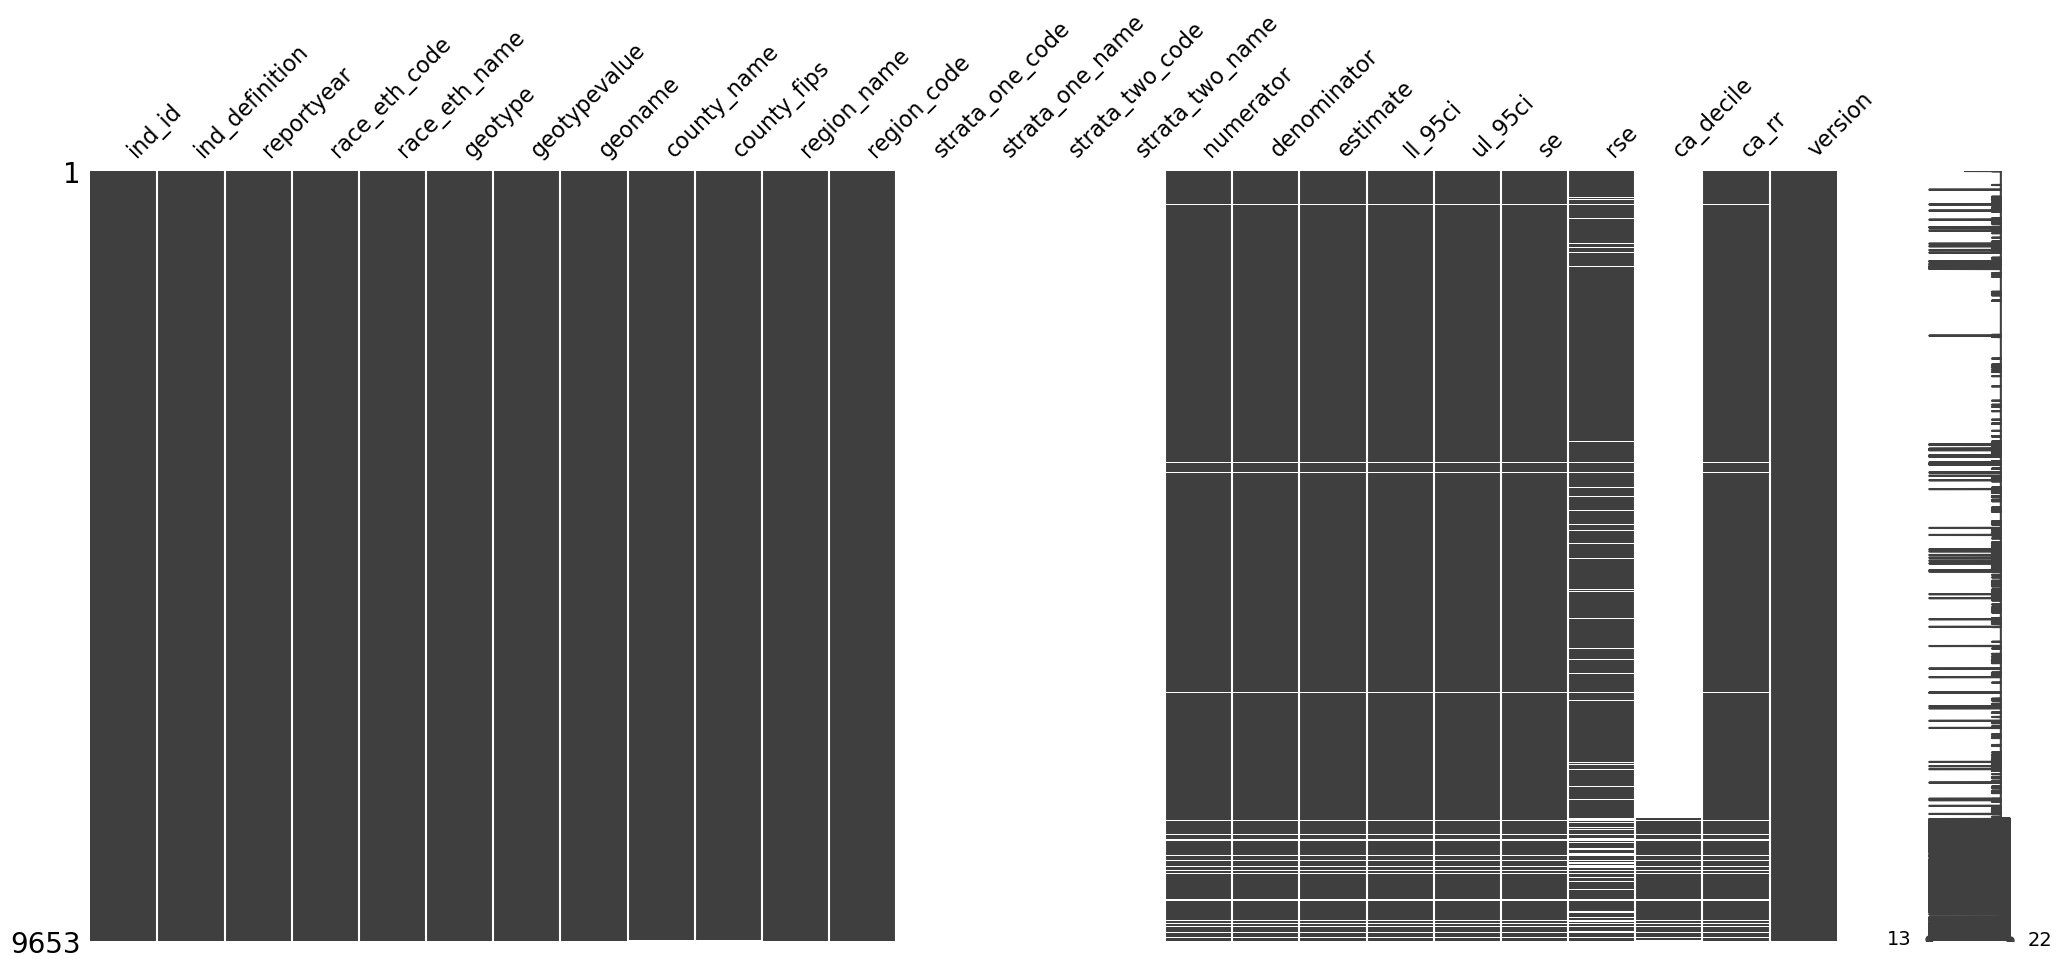

In [3]:
import missingno as msno
msno.matrix(mrfei)

The white colour represents the location of the missing value. So we know that there are 13 columns containing missing value. The columns that contain missing value is included **strata_one_code, strata_one_name, strata_two_code, strata_two_name, numerator, denominator, estimate, ll_95ci, ul95ci, se, rse, ca_decile, and ca_rr.**

<AxesSubplot:>

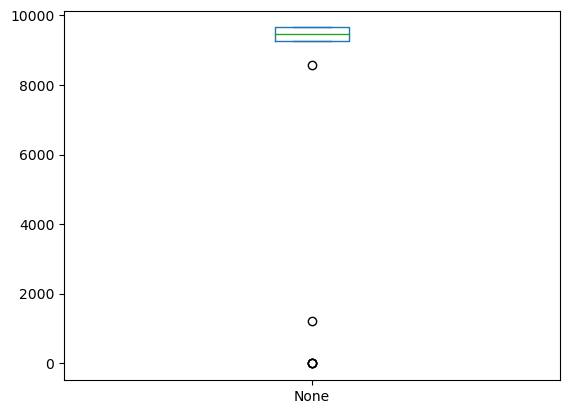

In [4]:
# another visualization of missing values based on counting
mrfei.count().plot.box()

In [5]:
print("The maximum row of data is", len(mrfei))

The maximum row of data is 9653


In [6]:
mrfei.dtypes

ind_id                      int64
ind_definition             object
reportyear                  int64
race_eth_code               int64
race_eth_name              object
geotype                    object
geotypevalue                int64
geoname                    object
county_name                object
county_fips               float64
region_name                object
region_code               float64
strata_one_code           float64
strata_one_name           float64
strata_two_code           float64
strata_two_name           float64
numerator                 float64
denominator               float64
estimate                  float64
ll_95ci                   float64
ul_95ci                   float64
se                        float64
rse                       float64
ca_decile                 float64
ca_rr                     float64
version            datetime64[ns]
dtype: object

In [7]:
# How many variables in the dataset
print("The number of variables is", len(list(mrfei.dtypes)))

The number of variables is 26


### Dropping Column

In [8]:
# from previous boxplot, we decide to drop the column less than 7000
# (because having too much missing value)
mrfei2 = filter(lambda col_nm: mrfei[col_nm].count() < 7000, mrfei)
mrfei2 = list(mrfei2)
mrfei2 # the list of columns will be drop

['strata_one_code',
 'strata_one_name',
 'strata_two_code',
 'strata_two_name',
 'ca_decile']

We decide to drop some columns which are **'strata_one_code', 'strata_one_name', 'strata_two_code', 'strata_two_name', and 'ca_decile'** because those columns are null data. The whole columns are nothing with a blank.

In [9]:
mrfei.drop(mrfei2, axis=1, inplace=True)

In [10]:
mrfei.drop('race_eth_code', axis = 1, inplace = True)
mrfei.drop('race_eth_name', axis = 1, inplace = True)

The reason we drop the two columns **'race_eth_code'** and **'race_eth_name'** is because all the data are inaccurate data which are **'9'** and **'Total'** respectively. The **'9'** in the numeric code for a race/ethnicity group represent unknown races, it mean all the data having unknown races and it is meaningless data for analysis.

In [11]:
print("The number of variable is", mrfei.count(1)[1]) 

The number of variable is 19


<AxesSubplot:>

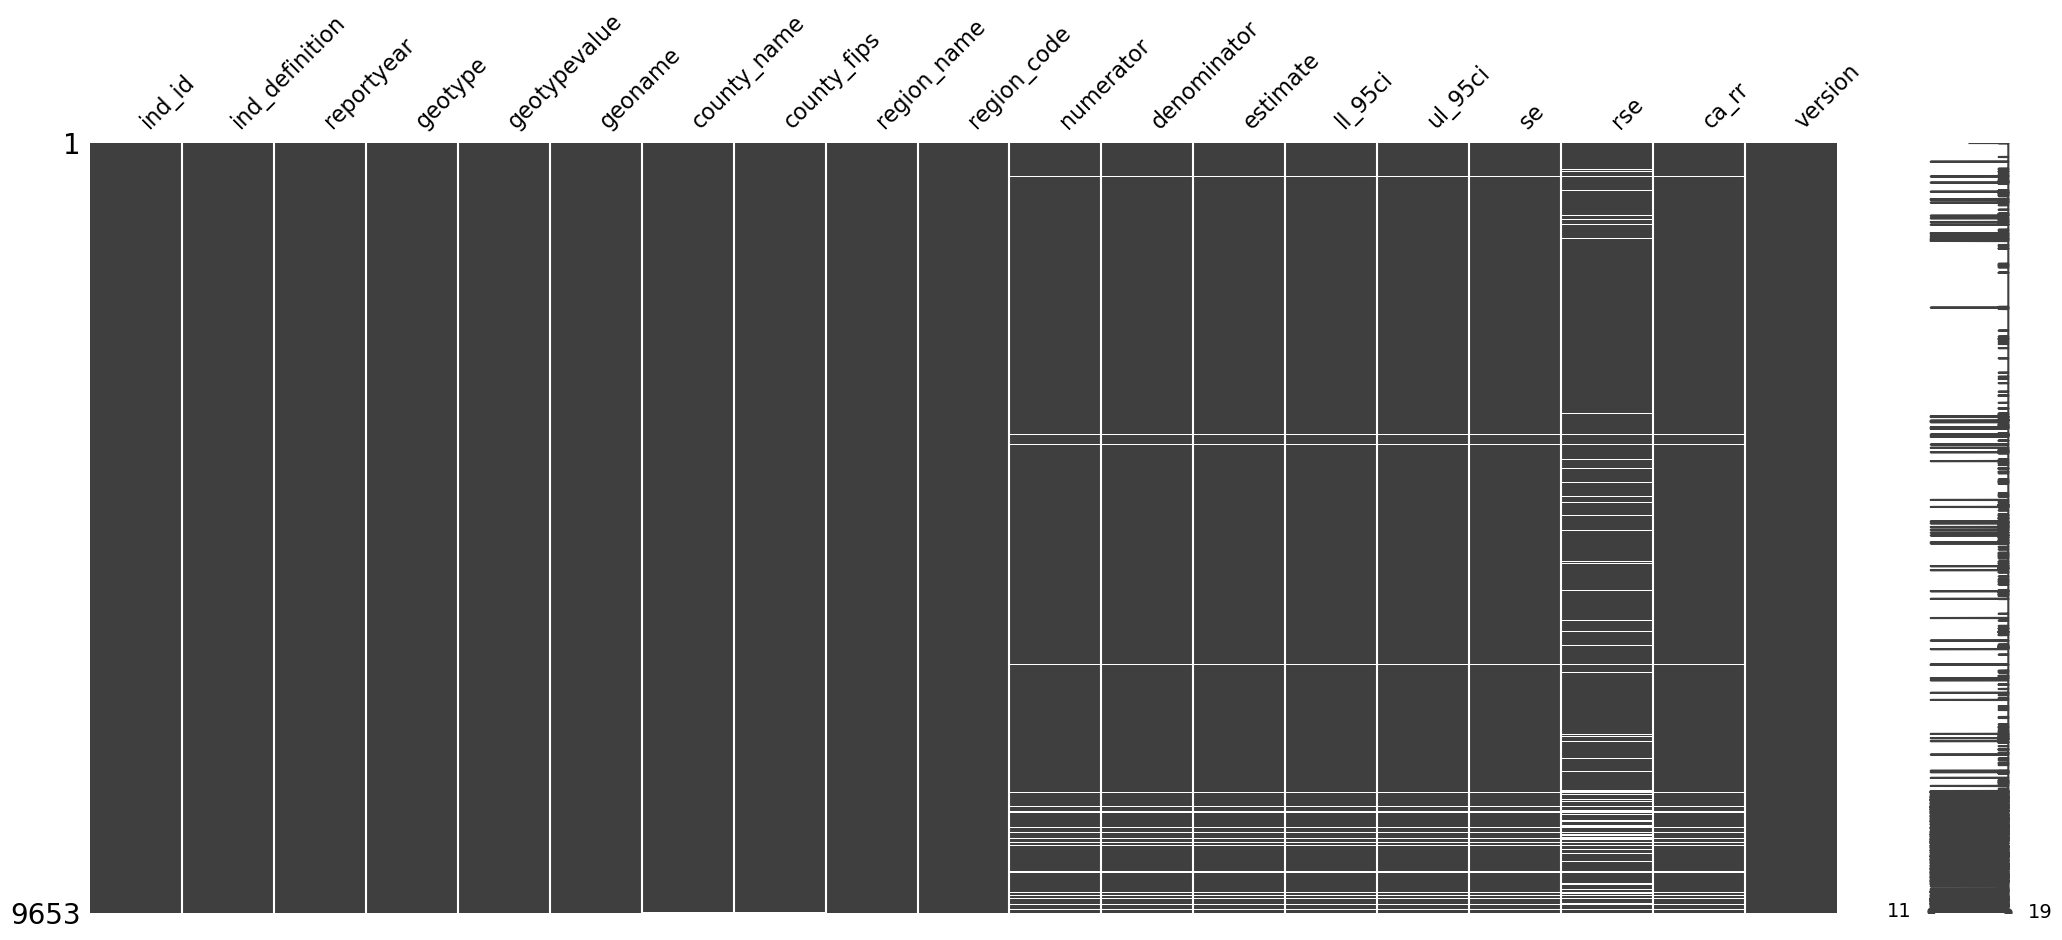

In [12]:
msno.matrix(mrfei)

### Replacing the value for geovalue and geoname (Inconsistent Data)

In [13]:
# Replacing the data in geoname by data county name
rowindex = (mrfei.index > 58) & (mrfei.index < 8116)
mrfei.loc[rowindex, 'geoname'] = mrfei.loc[rowindex, 'county_name']
# Replacing the data in geopervalue by data county fips
mrfei.loc[rowindex, 'geotypevalue'] = mrfei.loc[rowindex, 'county_fips']

The reason why we replaced the value between rows 59 to 8115 is because the data is inconsistent, most of the data in the **"geoname"** column is displayed in numbering but some of the "geoname" columns have the same data with **"county_name"** column. Same goes with the value of **"geotypevalue"** value also displays the numbering but the reason we want to replace is because the value is extremely bigger compared to other and thorough observations of the dataset. We see that most of the values in **"geotypevalue"** same as the **"county_fips"**. So we decide to replace the value of **"geoname"** and **"geotypevalue"** with the value of **"county_name"** and **"county fips"** respectively.

### Dropping Row

<AxesSubplot:>

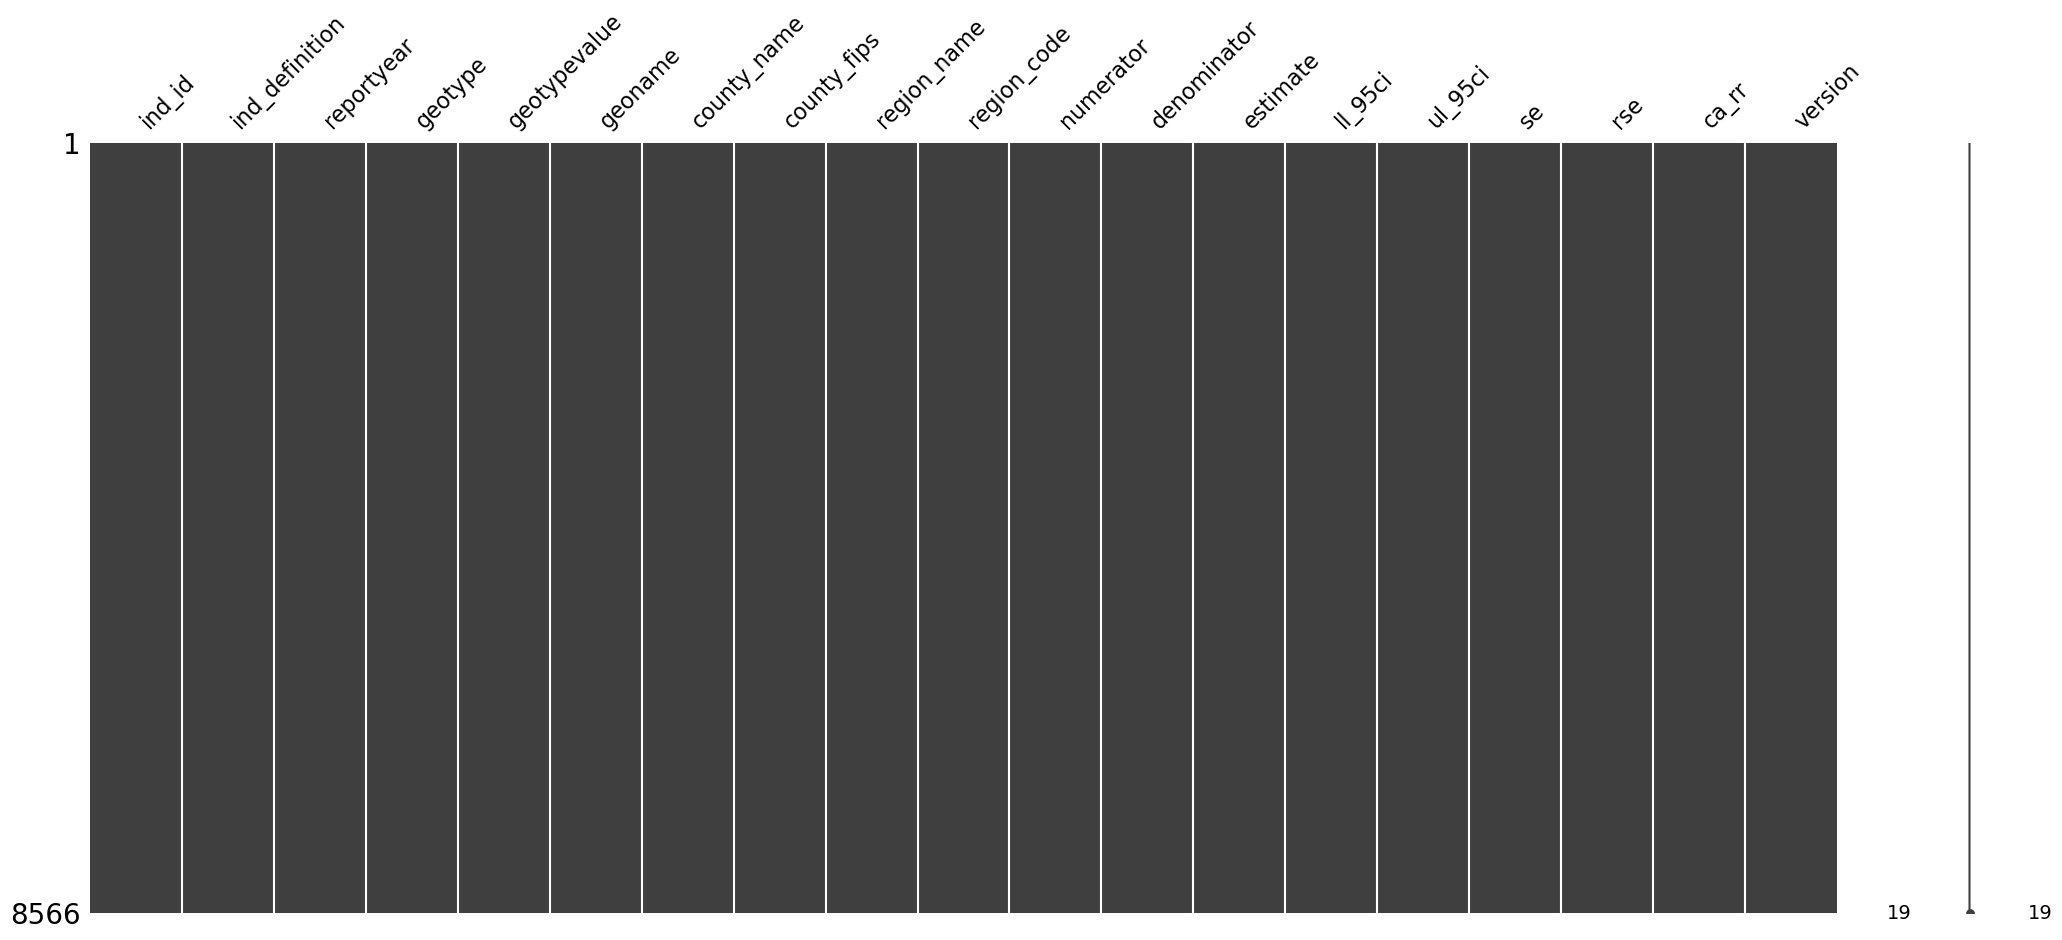

In [14]:
mrfei = mrfei.dropna()
msno.matrix(mrfei)

In [15]:
# count method to double confirm there is no more missing value
# if all variable having same amount of number of row, which is no more missing value
mrfei.count()

ind_id            8566
ind_definition    8566
reportyear        8566
geotype           8566
geotypevalue      8566
geoname           8566
county_name       8566
county_fips       8566
region_name       8566
region_code       8566
numerator         8566
denominator       8566
estimate          8566
ll_95ci           8566
ul_95ci           8566
se                8566
rse               8566
ca_rr             8566
version           8566
dtype: int64

### Rename the attributes

In [16]:
Newmrfei = mrfei.rename(columns = {'ll_95ci':'Lower limit of 95% confidence interval',
                                   'ul_95ci':'Upper limit of 95% confidence interval',
                                   'se':'Standard error of the estimate',
                                   'rse':'Relative standard error (se/estimate * 100) expressed as a percent',
                                   'ca_rr':'California Ratio: ratio estimate/state estimate'})
Newmrfei

ind_id                          ind_definition  reportyear geotype  \
1         75  Modified retail food environment index        2017      CO   
3         75  Modified retail food environment index        2017      CO   
4         75  Modified retail food environment index        2017      CO   
5         75  Modified retail food environment index        2017      CO   
6         75  Modified retail food environment index        2017      CO   
...      ...                                     ...         ...     ...   
9633      75  Modified retail food environment index        2017      PL   
9634      75  Modified retail food environment index        2017      PL   
9635      75  Modified retail food environment index        2017      PL   
9636      75  Modified retail food environment index        2017      PL   
9637      75  Modified retail food environment index        2017      PL   

      geotypevalue            geoname     county_name  county_fips  \
1             6001            Alameda         Alameda       6001.0   
3             6005             Amador          Amador       6005.0   
4             6007              Butte           Butte       6007.0   
5             6009          Calaveras       Calaveras       6009.0   
6             6011             Colusa          Colusa       6011.0   
...            ...                ...             ...          ...   
9633         86930    Yountville city            Napa       6055.0   
9634         86944         Yreka city        Siskiyou       6093.0   
9635         86972     Yuba City city          Sutter       6101.0   
9636         87042       Yucaipa city  San Bernardino       6071.0   
9637         87056  Yucca Valley town  San Bernardino       6071.0   

                     region_name  region_code  numerator  denominator  \
1                       Bay Area          1.0      424.0       2299.0   
3       Central/Southeast Sierra          3.0       14.0         59.0   
4                          Butte          2.0       65.0        308.0   
5       Central/Southeast Sierra          3.0       14.0         68.0   
6     Northern Sacramento Valley          7.0        6.0         26.0   
...                          ...          ...        ...          ...   
9633                    Bay Area          1.0        1.0          5.0   
9634            Northeast Sierra          6.0        3.0         22.0   
9635             Sacramento Area          8.0       23.0        125.0   
9636         Southern California         14.0       13.0         69.0   
9637         Southern California         14.0        5.0         42.0   

       estimate  Lower limit of 95% confidence interval  \
1     18.442801                               16.857429   
3     23.728814                               12.873351   
4     21.103896                               16.546783   
5     20.588235                               10.977567   
6     23.076923                                6.881710   
...         ...                                     ...   
9633  20.000000                                0.000000   
9634  13.636364                                0.000000   
9635  18.400000                               11.607103   
9636  18.840580                                9.613843   
9637  11.904762                                2.110584   

      Upper limit of 95% confidence interval  Standard error of the estimate  \
1                                  20.028173                        0.808863   
3                                  34.584276                        5.538501   
4                                  25.661009                        2.325058   
5                                  30.198904                        4.903402   
6                                  39.272136                        8.262864   
...                                      ...                             ...   
9633                               55.061546                       17.888544   
9634                      

### Add Column for longitude and latitude of the County

In [17]:
Newmrfei["Longitude"] = " "
Newmrfei["Latitude"] = " "

In [18]:
Newmrfei.loc[Newmrfei['county_name'] == 'Alameda', 'Longitude'] = -122.241638
Newmrfei.loc[Newmrfei['county_name'] == 'Alameda', 'Latitude'] = 37.765205
Newmrfei.loc[Newmrfei['county_name'] == 'Amador', 'Longitude'] = -120.824103
Newmrfei.loc[Newmrfei['county_name'] == 'Amador', 'Latitude'] = 38.4193553
Newmrfei.loc[Newmrfei['county_name'] == 'Butte', 'Longitude'] = -121.537
Newmrfei.loc[Newmrfei['county_name'] == 'Butte', 'Latitude'] = 39.625395
Newmrfei.loc[Newmrfei['county_name'] == 'Calaveras', 'Longitude'] = -120.5500
Newmrfei.loc[Newmrfei['county_name'] == 'Calaveras', 'Latitude'] = 38.2100
Newmrfei.loc[Newmrfei['county_name'] == 'Colusa', 'Longitude'] = -122.009417
Newmrfei.loc[Newmrfei['county_name'] == 'Colusa', 'Latitude'] = 39.214334
Newmrfei.loc[Newmrfei['county_name'] == 'Contra Costa', 'Longitude'] = -122.068848
Newmrfei.loc[Newmrfei['county_name'] == 'Contra Costa', 'Latitude'] = 37.934490
Newmrfei.loc[Newmrfei['county_name'] == 'Del Norte', 'Longitude'] = -123.9600
Newmrfei.loc[Newmrfei['county_name'] == 'Del Norte', 'Latitude'] = 41.7400
Newmrfei.loc[Newmrfei['county_name'] == 'El Dorado', 'Longitude'] = -121.081268
Newmrfei.loc[Newmrfei['county_name'] == 'El Dorado', 'Latitude'] = 38.686295
Newmrfei.loc[Newmrfei['county_name'] == 'Fresno', 'Longitude'] = -119.772591
Newmrfei.loc[Newmrfei['county_name'] == 'Fresno', 'Latitude'] = 36.746841
Newmrfei.loc[Newmrfei['county_name'] == 'Glenn', 'Longitude'] = -122.013865
Newmrfei.loc[Newmrfei['county_name'] == 'Glenn', 'Latitude'] = 39.521828
Newmrfei.loc[Newmrfei['county_name'] == 'Humboldt', 'Longitude'] = -124.183922
Newmrfei.loc[Newmrfei['county_name'] == 'Humboldt', 'Latitude'] = 40.785114
Newmrfei.loc[Newmrfei['county_name'] == 'Imperial', 'Longitude'] = -115.569439
Newmrfei.loc[Newmrfei['county_name'] == 'Imperial', 'Latitude'] = 32.847553
Newmrfei.loc[Newmrfei['county_name'] == 'Inyo', 'Longitude'] = -118.267822
Newmrfei.loc[Newmrfei['county_name'] == 'Inyo', 'Latitude'] = 36.564806
Newmrfei.loc[Newmrfei['county_name'] == 'Kern', 'Longitude'] = -119.043732
Newmrfei.loc[Newmrfei['county_name'] == 'Kern', 'Latitude'] = 35.393528
Newmrfei.loc[Newmrfei['county_name'] == 'Kings', 'Longitude'] = -118.555145
Newmrfei.loc[Newmrfei['county_name'] == 'Kings', 'Latitude'] = 36.887856
Newmrfei.loc[Newmrfei['county_name'] == 'Lake', 'Longitude'] = -117.693100
Newmrfei.loc[Newmrfei['county_name'] == 'Lake', 'Latitude'] = 33.650066
Newmrfei.loc[Newmrfei['county_name'] == 'Lassen', 'Longitude'] = -122.241638
Newmrfei.loc[Newmrfei['county_name'] == 'Lassen', 'Latitude'] = 40.49766
Newmrfei.loc[Newmrfei['county_name'] == 'Los Angeles', 'Longitude'] = -118.243683
Newmrfei.loc[Newmrfei['county_name'] == 'Los Angeles', 'Latitude'] = 34.052235
Newmrfei.loc[Newmrfei['county_name'] == 'Madera', 'Longitude'] = -119.795166
Newmrfei.loc[Newmrfei['county_name'] == 'Madera', 'Latitude'] = 36.899097
Newmrfei.loc[Newmrfei['county_name'] == 'Marin', 'Longitude'] = -122.763304
Newmrfei.loc[Newmrfei['county_name'] == 'Marin', 'Latitude'] = 38.083403
Newmrfei.loc[Newmrfei['county_name'] == 'Mariposa', 'Longitude'] = -119.967690
Newmrfei.loc[Newmrfei['county_name'] == 'Mariposa', 'Latitude'] = 37.487118
Newmrfei.loc[Newmrfei['county_name'] == 'Mendocino', 'Longitude'] = -123.810278
Newmrfei.loc[Newmrfei['county_name'] == 'Mendocino', 'Latitude'] = 39.375278
Newmrfei.loc[Newmrfei['county_name'] == 'Merced', 'Longitude'] = -120.499992
Newmrfei.loc[Newmrfei['county_name'] == 'Merced', 'Latitude'] = 37.325954
Newmrfei.loc[Newmrfei['county_name'] == 'Modoc', 'Longitude'] = -120.736847469
Newmrfei.loc[Newmrfei['county_name'] == 'Modoc', 'Latitude'] = 41.576517175
Newmrfei.loc[Newmrfei['county_name'] == 'Mono', 'Longitude'] = -119.012259
Newmrfei.loc[Newmrfei['county_name'] == 'Mono', 'Latitude'] = 38.007059
Newmrfei.loc[Newmrfei['county_name'] == 'Monterey', 'Longitude'] = -121.898460
Newmrfei.loc[Newmrfei['county_name'] == 'Monterey', 'Latitude'] = 36.603954
Newmrfei.loc[Newmrfei['county_name'] == 'Napa', 'Longitude'] = -122.286865
Newmrfei.loc[Newmrfei['county_name'] == 'Napa', 'Latitude'] = 38.297539
Newmrfei.loc[Newmrfei['county_name'] == 'Nevada', 'Longitude'] = -117.224121
Newmrfei.loc[Newmrfei['county_name'] == 'Nevada', 'Latitude'] = 39.876019
Newmrfei.loc[Newmrfei['county_name'] == 'Orange', 'Longitude'] = -117.853104
Newmrfei.loc[Newmrfei['county_name'] == 'Orange', 'Latitude'] = 33.787914
Newmrfei.loc[Newmrfei['county_name'] == 'Placer', 'Longitude'] = -121.288010
Newmrfei.loc[Newmrfei['county_name'] == 'Placer', 'Latitude'] = 38.752125
Newmrfei.loc[Newmrfei['county_name'] == 'Plumas', 'Longitude'] = -121.558487
Newmrfei.loc[Newmrfei['county_name'] == 'Plumas', 'Latitude'] = 39.022118
Newmrfei.loc[Newmrfei['county_name'] == 'Riverside', 'Longitude'] = -117.396156
Newmrfei.loc[Newmrfei['county_name'] == 'Riverside', 'Latitude'] = 33.953350
Newmrfei.loc[Newmrfei['county_name'] == 'Sacramento', 'Longitude'] = -121.478851
Newmrfei.loc[Newmrfei['county_name'] == 'Sacramento', 'Latitude'] = 38.575764
Newmrfei.loc[Newmrfei['county_name'] == 'San Benito', 'Longitude'] = -121.0800
Newmrfei.loc[Newmrfei['county_name'] == 'San Benito', 'Latitude'] = 36.6100
Newmrfei.loc[Newmrfei['county_name'] == 'San Bernardino', 'Longitude'] = -117.302399
Newmrfei.loc[Newmrfei['county_name'] == 'San Bernardino', 'Latitude'] = 34.115784
Newmrfei.loc[Newmrfei['county_name'] == 'San Diego', 'Longitude'] = -117.161087
Newmrfei.loc[Newmrfei['county_name'] == 'San Diego', 'Latitude'] = 37.765205
Newmrfei.loc[Newmrfei['county_name'] == 'San Francisco', 'Longitude'] =  -122.431297
Newmrfei.loc[Newmrfei['county_name'] == 'San Francisco', 'Latitude'] = 37.773972
Newmrfei.loc[Newmrfei['county_name'] == 'San Joaquin', 'Longitude'] = -121.171039
Newmrfei.loc[Newmrfei['county_name'] == 'San Joaquin', 'Latitude'] = 37.917594
Newmrfei.loc[Newmrfei['county_name'] == 'San Luis Obispo', 'Longitude'] = -120.680656
Newmrfei.loc[Newmrfei['county_name'] == 'San Luis Obispo', 'Latitude'] = 35.270378
Newmrfei.loc[Newmrfei['county_name'] == 'San Mateo', 'Longitude'] = -122.313057
Newmrfei.loc[Newmrfei['county_name'] == 'San Mateo', 'Latitude'] = 37.554169
Newmrfei.loc[Newmrfei['county_name'] == 'Santa Barbara', 'Longitude'] = -119.698189
Newmrfei.loc[Newmrfei['county_name'] == 'Santa Barbara', 'Latitude'] = 34.420830
Newmrfei.loc[Newmrfei['county_name'] == 'Santa Clara', 'Longitude'] = -121.955238
Newmrfei.loc[Newmrfei['county_name'] == 'Santa Clara', 'Latitude'] = 37.354107
Newmrfei.loc[Newmrfei['county_name'] == 'Santa Cruz', 'Longitude'] = -122.030792
Newmrfei.loc[Newmrfei['county_name'] == 'Santa Cruz', 'Latitude'] = 36.974117
Newmrfei.loc[Newmrfei['county_name'] == 'Shasta', 'Longitude'] = -122.201180
Newmrfei.loc[Newmrfei['county_name'] == 'Shasta', 'Latitude'] = 41.409767
Newmrfei.loc[Newmrfei['county_name'] == 'Sierra', 'Longitude'] = -118.232224
Newmrfei.loc[Newmrfei['county_name'] == 'Sierra', 'Latitude'] = 34.543888
Newmrfei.loc[Newmrfei['county_name'] == 'Siskiyou', 'Longitude'] = -122.577013
Newmrfei.loc[Newmrfei['county_name'] == 'Siskiyou', 'Latitude'] = 41.774326
Newmrfei.loc[Newmrfei['county_name'] == 'Solano', 'Longitude'] = -121.901795
Newmrfei.loc[Newmrfei['county_name'] == 'Solano', 'Latitude'] = 38.310497
Newmrfei.loc[Newmrfei['county_name'] == 'Sonoma', 'Longitude'] = -122.461510
Newmrfei.loc[Newmrfei['county_name'] == 'Sonoma', 'Latitude'] = 38.294788
Newmrfei.loc[Newmrfei['county_name'] == 'Stanislaus', 'Longitude'] = -120.066483
Newmrfei.loc[Newmrfei['county_name'] == 'Stanislaus', 'Latitude'] = 38.235195
Newmrfei.loc[Newmrfei['county_name'] == 'Sutter', 'Longitude'] = -121.750145
Newmrfei.loc[Newmrfei['county_name'] == 'Sutter', 'Latitude'] = 39.163074
Newmrfei.loc[Newmrfei['county_name'] == 'Tehama', 'Longitude'] = -122.404426
Newmrfei.loc[Newmrfei['county_name'] == 'Tehama', 'Latitude'] = 37.781094
Newmrfei.loc[Newmrfei['county_name'] == 'Trinity', 'Longitude'] = -123.1200
Newmrfei.loc[Newmrfei['county_name'] == 'Trinity', 'Latitude'] = 40.6600
Newmrfei.loc[Newmrfei['county_name'] == 'Tulare', 'Longitude'] = -119.347336
Newmrfei.loc[Newmrfei['county_name'] == 'Tulare', 'Latitude'] = 36.207729
Newmrfei.loc[Newmrfei['county_name'] == 'Tuolumne', 'Longitude'] = -120.2412999
Newmrfei.loc[Newmrfei['county_name'] == 'Tuolumne', 'Latitude'] = 37.9627027
Newmrfei.loc[Newmrfei['county_name'] == 'Ventura', 'Longitude'] = -119.229034
Newmrfei.loc[Newmrfei['county_name'] == 'Ventura', 'Latitude'] = 34.274647
Newmrfei.loc[Newmrfei['county_name'] == 'Yolo', 'Longitude'] = -121.807281
Newmrfei.loc[Newmrfei['county_name'] == 'Yolo', 'Latitude'] = 38.732967
Newmrfei.loc[Newmrfei['county_name'] == 'Yuba', 'Longitude'] = -121.607841
Newmrfei.loc[Newmrfei['county_name'] == 'Yuba', 'Latitude'] = 39.136986

In [19]:
# Ensure that the data have fill in the column longitude and latitude
Newmrfei

ind_id                          ind_definition  reportyear geotype  \
1         75  Modified retail food environment index        2017      CO   
3         75  Modified retail food environment index        2017      CO   
4         75  Modified retail food environment index        2017      CO   
5         75  Modified retail food environment index        2017      CO   
6         75  Modified retail food environment index        2017      CO   
...      ...                                     ...         ...     ...   
9633      75  Modified retail food environment index        2017      PL   
9634      75  Modified retail food environment index        2017      PL   
9635      75  Modified retail food environment index        2017      PL   
9636      75  Modified retail food environment index        2017      PL   
9637      75  Modified retail food environment index        2017      PL   

      geotypevalue            geoname     county_name  county_fips  \
1             6001            Alameda         Alameda       6001.0   
3             6005             Amador          Amador       6005.0   
4             6007              Butte           Butte       6007.0   
5             6009          Calaveras       Calaveras       6009.0   
6             6011             Colusa          Colusa       6011.0   
...            ...                ...             ...          ...   
9633         86930    Yountville city            Napa       6055.0   
9634         86944         Yreka city        Siskiyou       6093.0   
9635         86972     Yuba City city          Sutter       6101.0   
9636         87042       Yucaipa city  San Bernardino       6071.0   
9637         87056  Yucca Valley town  San Bernardino       6071.0   

                     region_name  region_code  ...  denominator   estimate  \
1                       Bay Area          1.0  ...       2299.0  18.442801   
3       Central/Southeast Sierra          3.0  ...         59.0  23.728814   
4                          Butte          2.0  ...        308.0  21.103896   
5       Central/Southeast Sierra          3.0  ...         68.0  20.588235   
6     Northern Sacramento Valley          7.0  ...         26.0  23.076923   
...                          ...          ...  ...          ...        ...   
9633                    Bay Area          1.0  ...          5.0  20.000000   
9634            Northeast Sierra          6.0  ...         22.0  13.636364   
9635             Sacramento Area          8.0  ...        125.0  18.400000   
9636         Southern California         14.0  ...         69.0  18.840580   
9637         Southern California         14.0  ...         42.0  11.904762   

      Lower limit of 95% confidence interval  \
1                                  16.857429   
3                                  12.873351   
4                                  16.546783   
5                                  10.977567   
6                                   6.881710   
...                                      ...   
9633                                0.000000   
9634                                0.000000   
9635                               11.607103   
9636                                9.613843   
9637                                2.110584   

      Upper limit of 95% confidence interval  Standard error of the estimate  \
1                                  20.028173                        0.808863   
3                                  34.584276                        5.538501   
4                                  25.661009                        2.325058   
5                                  30.198904                        4.903402   
6                                  39.272136                        8.262864   
...                                      ...                             ...   
9633                               55.061546                       17.888544   
9634                               27.976705                        7.316500   
9635              

In [20]:
Newmrfei = Newmrfei.reset_index(drop=True)
Newmrfei

ind_id                          ind_definition  reportyear geotype  \
0         75  Modified retail food environment index        2017      CO   
1         75  Modified retail food environment index        2017      CO   
2         75  Modified retail food environment index        2017      CO   
3         75  Modified retail food environment index        2017      CO   
4         75  Modified retail food environment index        2017      CO   
...      ...                                     ...         ...     ...   
8561      75  Modified retail food environment index        2017      PL   
8562      75  Modified retail food environment index        2017      PL   
8563      75  Modified retail food environment index        2017      PL   
8564      75  Modified retail food environment index        2017      PL   
8565      75  Modified retail food environment index        2017      PL   

      geotypevalue            geoname     county_name  county_fips  \
0             6001            Alameda         Alameda       6001.0   
1             6005             Amador          Amador       6005.0   
2             6007              Butte           Butte       6007.0   
3             6009          Calaveras       Calaveras       6009.0   
4             6011             Colusa          Colusa       6011.0   
...            ...                ...             ...          ...   
8561         86930    Yountville city            Napa       6055.0   
8562         86944         Yreka city        Siskiyou       6093.0   
8563         86972     Yuba City city          Sutter       6101.0   
8564         87042       Yucaipa city  San Bernardino       6071.0   
8565         87056  Yucca Valley town  San Bernardino       6071.0   

                     region_name  region_code  ...  denominator   estimate  \
0                       Bay Area          1.0  ...       2299.0  18.442801   
1       Central/Southeast Sierra          3.0  ...         59.0  23.728814   
2                          Butte          2.0  ...        308.0  21.103896   
3       Central/Southeast Sierra          3.0  ...         68.0  20.588235   
4     Northern Sacramento Valley          7.0  ...         26.0  23.076923   
...                          ...          ...  ...          ...        ...   
8561                    Bay Area          1.0  ...          5.0  20.000000   
8562            Northeast Sierra          6.0  ...         22.0  13.636364   
8563             Sacramento Area          8.0  ...        125.0  18.400000   
8564         Southern California         14.0  ...         69.0  18.840580   
8565         Southern California         14.0  ...         42.0  11.904762   

      Lower limit of 95% confidence interval  \
0                                  16.857429   
1                                  12.873351   
2                                  16.546783   
3                                  10.977567   
4                                   6.881710   
...                                      ...   
8561                                0.000000   
8562                                0.000000   
8563                               11.607103   
8564                                9.613843   
8565                                2.110584   

      Upper limit of 95% confidence interval  Standard error of the estimate  \
0                                  20.028173                        0.808863   
1                                  34.584276                        5.538501   
2                                  25.661009                        2.325058   
3                                  30.198904                        4.903402   
4                                  39.272136                        8.262864   
...                                      ...                             ...   
8561                               55.061546                       17.888544   
8562                               27.976705                        7.316500   
8563              

# Save to Excel file

In [21]:
# We save to excel to double confirm is that the value got replaced
Newmrfei.to_excel('Mrfei.xlsx', index=False)

We have reach at the point where there is no obvious missing data, thus the data is cleaner than initially.

### Detect and Filter Outlier

In [22]:
import sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pprint

In [23]:
dfmrfei = pd.DataFrame(Newmrfei)
dfmrfei.head()

ind_id                          ind_definition  reportyear geotype  \
0      75  Modified retail food environment index        2017      CO   
1      75  Modified retail food environment index        2017      CO   
2      75  Modified retail food environment index        2017      CO   
3      75  Modified retail food environment index        2017      CO   
4      75  Modified retail food environment index        2017      CO   

   geotypevalue    geoname county_name  county_fips  \
0          6001    Alameda     Alameda       6001.0   
1          6005     Amador      Amador       6005.0   
2          6007      Butte       Butte       6007.0   
3          6009  Calaveras   Calaveras       6009.0   
4          6011     Colusa      Colusa       6011.0   

                  region_name  region_code  ...  denominator   estimate  \
0                    Bay Area          1.0  ...       2299.0  18.442801   
1    Central/Southeast Sierra          3.0  ...         59.0  23.728814   
2                       Butte          2.0  ...        308.0  21.103896   
3    Central/Southeast Sierra          3.0  ...         68.0  20.588235   
4  Northern Sacramento Valley          7.0  ...         26.0  23.076923   

   Lower limit of 95% confidence interval  \
0                               16.857429   
1                               12.873351   
2                               16.546783   
3                               10.977567   
4                                6.881710   

   Upper limit of 95% confidence interval  Standard error of the estimate  \
0                               20.028173                        0.808863   
1                               34.584276                        5.538501   
2                               25.661009                        2.325058   
3                               30.198904                        4.903402   
4                               39.272136                        8.262864   

   Relative standard error (se/estimate * 100) expressed as a percent  \
0                                           4.385794                    
1                                          23.340827                    
2                                          11.017197                    
3                                          23.816526                    
4                                          35.805744                    

   California Ratio: ratio estimate/state estimate             version  \
0                                         1.030997 2017-11-15 16:52:07   
1                                         1.326498 2017-11-15 16:52:07   
2                                         1.179759 2017-11-15 16:52:07   
3                                         1.150932 2017-11-15 16:52:07   
4                                         1.290056 2017-11-15 16:52:07   

    Longitude   Latitude  
0 -122.241638  37.765205  
1 -120.824103  38.419355  
2    -121.537  39.625395  
3     -120.55      38.21  
4 -122.009417  39.214334  

[5 rows x 21 columns]

In [24]:
# it will select specific subsets of columns to show until numerator column for temporary
def leg_stepping(start, end,step = 1):
	'''
		eg.: it = leg_stepping(1, 10, 3)
		print(next(it)) -> (1, 4)
		print(next(it)) -> (5, 8)
		print(next(it)) -> (9, 10)
	'''
	assert(start < end)
	while start+step < end:
		yield {"start": start, "end": start+step}
		start += step+1
	yield {"start": start, "end": end}
ind_iter = leg_stepping(0, len(list(Newmrfei.dtypes)), 10)
tmp_viewer = lambda curr: Newmrfei.iloc[:, curr["start"]:curr["end"]]
curr_slice = next(ind_iter)
tmp_viewer(curr_slice)

ind_id                          ind_definition  reportyear geotype  \
0         75  Modified retail food environment index        2017      CO   
1         75  Modified retail food environment index        2017      CO   
2         75  Modified retail food environment index        2017      CO   
3         75  Modified retail food environment index        2017      CO   
4         75  Modified retail food environment index        2017      CO   
...      ...                                     ...         ...     ...   
8561      75  Modified retail food environment index        2017      PL   
8562      75  Modified retail food environment index        2017      PL   
8563      75  Modified retail food environment index        2017      PL   
8564      75  Modified retail food environment index        2017      PL   
8565      75  Modified retail food environment index        2017      PL   

      geotypevalue            geoname     county_name  county_fips  \
0             6001            Alameda         Alameda       6001.0   
1             6005             Amador          Amador       6005.0   
2             6007              Butte           Butte       6007.0   
3             6009          Calaveras       Calaveras       6009.0   
4             6011             Colusa          Colusa       6011.0   
...            ...                ...             ...          ...   
8561         86930    Yountville city            Napa       6055.0   
8562         86944         Yreka city        Siskiyou       6093.0   
8563         86972     Yuba City city          Sutter       6101.0   
8564         87042       Yucaipa city  San Bernardino       6071.0   
8565         87056  Yucca Valley town  San Bernardino       6071.0   

                     region_name  region_code  
0                       Bay Area          1.0  
1       Central/Southeast Sierra          3.0  
2                          Butte          2.0  
3       Central/Southeast Sierra          3.0  
4     Northern Sacramento Valley          7.0  
...                          ...          ...  
8561                    Bay Area          1.0  
8562            Northeast Sierra          6.0  
8563             Sacramento Area          8.0  
8564         Southern California         14.0  
8565         Southern California         14.0  

[8566 rows x 10 columns]

In [25]:
#create a list  for column indexing
ColumnofOutlier=["numerator","denominator","estimate"]
print(len(ColumnofOutlier))

3


In [26]:
#create a dict to store location of outlier
out_dict = {}
new_key=0
for b in ColumnofOutlier:
    z = np.abs(stats.zscore(dfmrfei[b]))
    out_index= np.where(z>3)
    
    # add into dictionary
    new_key+=1
    out_dict[b] = out_index


pprint.pprint(out_dict)

{'denominator': (array([   0,    5,    8,   13,   17,   28,   31,   32,   34,   35,   36,
         37,   39,   41,   46,   47,   48,   54, 7661, 7692, 7930, 8099,
       8104, 8212, 8341, 8353, 8357, 8362], dtype=int64),),
 'estimate': (array([ 448,  451,  501,  711,  714,  715,  733,  772,  775,  849,  878,
        881,  923,  992,  994,  996, 1633, 1833, 2644, 2779, 3479, 3494,
       3505, 3512, 3514, 3525, 3532, 3537, 3542, 3545, 3599, 3652, 4252,
       4475, 4508, 4592, 4653, 4661, 4850, 5083, 5278, 5364, 5397, 5418,
       5707, 5952, 6179, 6180, 6182, 6185, 6189, 6345, 6521, 6543, 6911,
       6937, 7009, 7022, 7133, 7259, 7260, 7326, 7327, 7345, 7358, 7391,
       7403, 7405, 7417, 7506, 7626, 7629, 7763, 7800, 7916, 7947, 7978,
       7996, 8020, 8021, 8051, 8074, 8086, 8113, 8193, 8216, 8275, 8276,
       8292, 8395, 8456, 8479, 8558], dtype=int64),),
 'numerator': (array([   0,    5,    8,   13,   17,   25,   28,   31,   32,   34,   35,
         36,   37,   39,   40,   41, 

In [27]:
#to extract outlier value

for b in ColumnofOutlier:
    print("Outlier value for " + b)
    print(dfmrfei[b].iloc[out_dict[b]])
    print(" ")
    print("-------------------------------------------------------------- ")

Outlier value for numerator
0        424.0
5        222.0
8        339.0
13       276.0
17      2500.0
25       157.0
28       615.0
31       427.0
32       368.0
34       426.0
35       760.0
36       272.0
37       220.0
39       198.0
40       130.0
41       384.0
47       143.0
48       161.0
52       175.0
54       206.0
7692     139.0
7930     202.0
8099     134.0
8104    1188.0
8212     171.0
8341     168.0
8353     369.0
8357     272.0
8362     236.0
Name: numerator, dtype: float64
 
-------------------------------------------------------------- 
Outlier value for denominator
0        2299.0
5        1420.0
8        1463.0
13       1235.0
17      13973.0
28       4725.0
31       2608.0
32       2045.0
34       2684.0
35       4597.0
36       1614.0
37        981.0
39       1059.0
41       2360.0
46        652.0
47        750.0
48        762.0
54       1193.0
7661      699.0
7692      682.0
7930      942.0
8099      840.0
8104     6295.0
8212      714.0
8341      857.0
8353     

In [28]:
len(dfmrfei[b].iloc[out_dict['numerator']])

29

In [29]:
min(dfmrfei['numerator'].iloc[out_dict['numerator']])

130.0

In [30]:
len(dfmrfei[b].iloc[out_dict['denominator']])

28

In [31]:
min(dfmrfei['denominator'].iloc[out_dict['denominator']])

652.0

In [32]:
len(dfmrfei[b].iloc[out_dict['estimate']])

93

In [33]:
min(dfmrfei['estimate'].iloc[out_dict['estimate']])

54.5454545454545

We using len() function to detect how many outlier in each attributes and using min to find the lowest outlier and then will decide to filter the outlier that greater than the lowest value outlier.

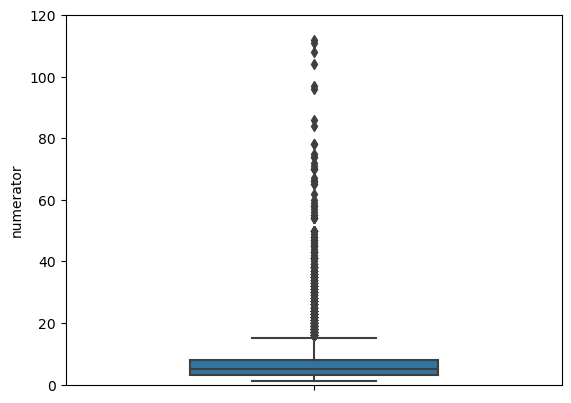

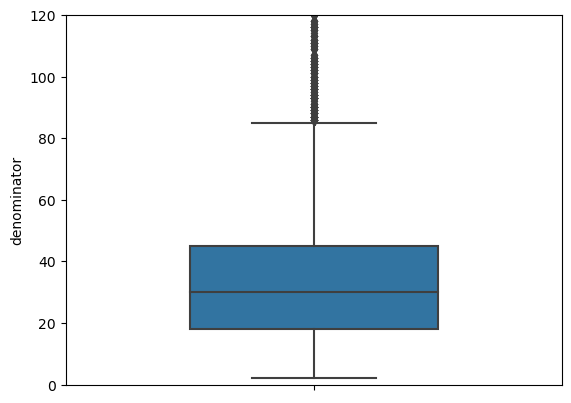

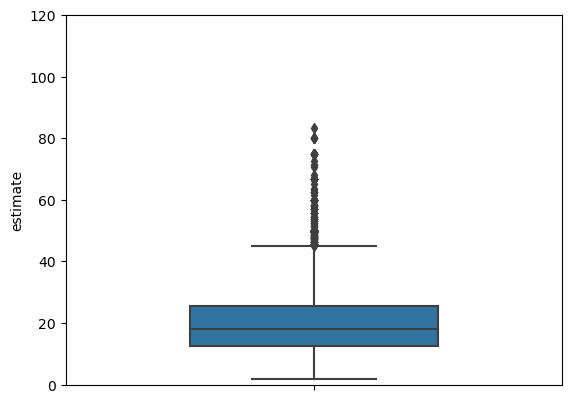

In [34]:
for col in ColumnofOutlier:
    # Set the figure size for each boxplot
    ax = sns.boxplot(y=dfmrfei[col], width = 0.5)
    
    # Set the height of the boxplot
    ax.set_ylim(0, 120)  # Adjust the maximum value 
    
    plt.show()  # Display the boxplot

We can see that their outliers does not really distort the mean and standard deviation, thus we decide to keep them.

### Visualization

In [35]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

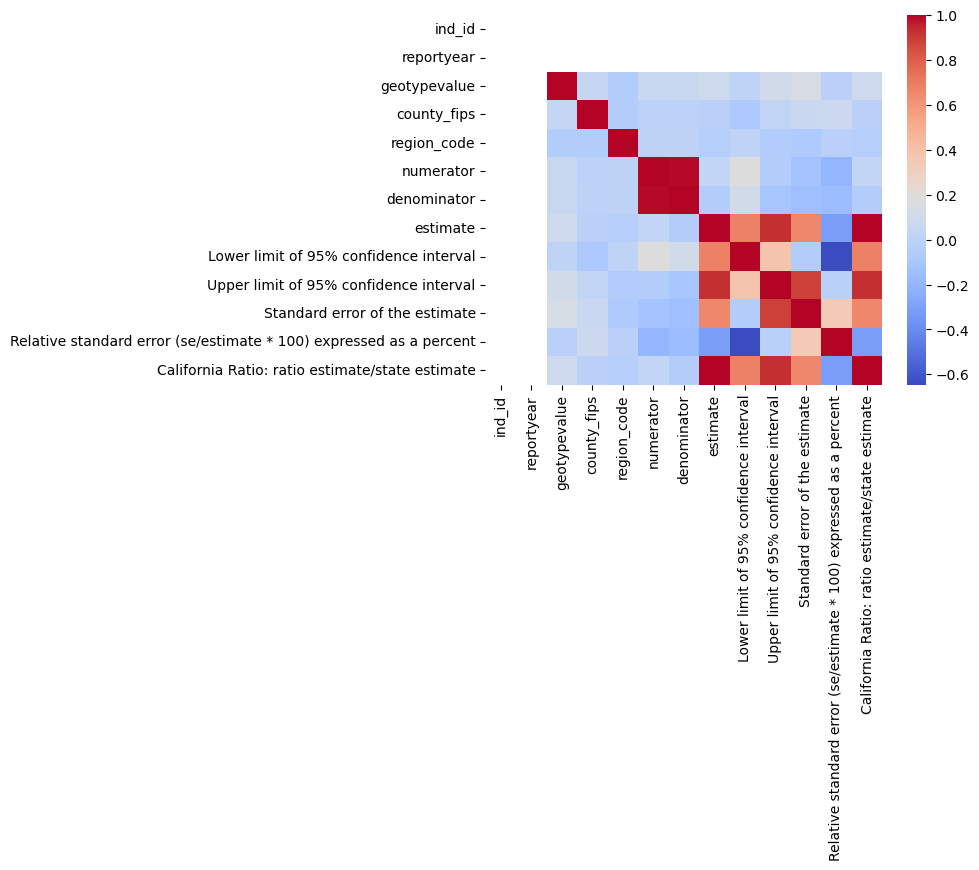

In [36]:
sns.heatmap(Newmrfei.corr(),cmap="coolwarm")

In [37]:
mrfeidf1 = Newmrfei[['county_name','Longitude','Latitude','estimate']]
mrfeidf1.groupby('county_name')['estimate'].sum()
mrfeidf1.sort_values(by=["estimate"],inplace=True)
mrfeidf1

C:\Users\limbi\AppData\Local\Temp\ipykernel_24892\4222125656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mrfeidf1.sort_values(by=["estimate"],inplace=True)


county_name   Longitude   Latitude   estimate
1469     Los Angeles -118.243683  34.052235   1.851852
5297  San Bernardino -117.302399  34.115784   2.000000
2487     Los Angeles -118.243683  34.052235   2.040816
4170          Orange -117.853104  33.787914   2.127660
1467     Los Angeles -118.243683  34.052235   2.173913
...              ...         ...        ...        ...
6521   Santa Barbara -119.698189   34.42083  80.000000
7506         Ventura -119.229034  34.274647  80.000000
7626            Yolo -121.807281  38.732967  80.000000
8216       Riverside -117.396156   33.95335  80.000000
3479       Mendocino -123.810278  39.375278  83.333333

[8566 rows x 4 columns]

In [38]:
# Find the maximum and minimum value of longitude and latitude to fix the area to easily see the visualization
mrfeidf1.max()

county_name          Yuba
Longitude     -115.569439
Latitude        41.774326
estimate        83.333333
dtype: object

In [39]:
mrfeidf1.min()

county_name       Alameda
Longitude     -124.183922
Latitude        32.847553
estimate         1.851852
dtype: object

In [40]:
fig = px.scatter_geo(mrfeidf1,
                    lon='Longitude',
                    lat='Latitude',
                    locationmode="ISO-3",
                    color="estimate", #column by which to color-code
                    hover_name="county_name", # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
# add a title text for the plot
title_text = 'Total estimate in each county'
)

# Fixing the map to a certain location
fig.update_geos(center=dict(), 
                projection_type="natural earth",
                lataxis_range=[32.847553, 41.774326], 
                lonaxis_range=[-124.183922, -115.569439])

fig.show()

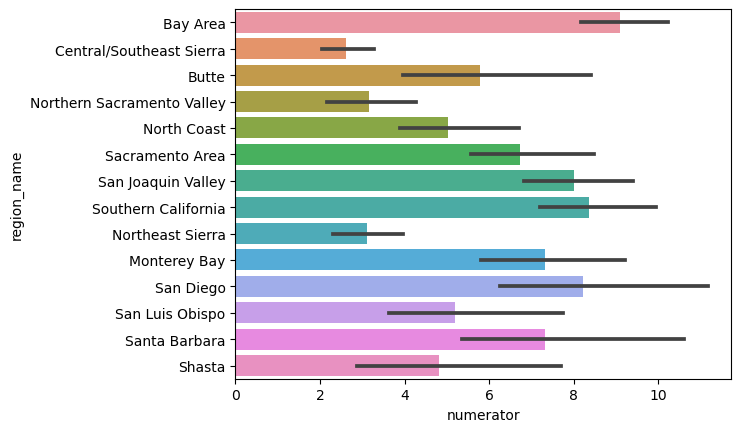

In [41]:
sns.barplot(y = 'region_name', x = 'numerator', data = Newmrfei)
plt.show()

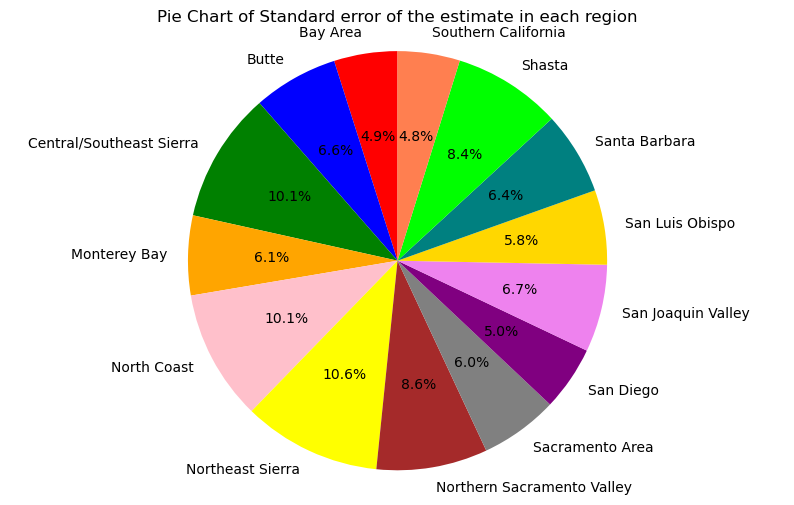

In [42]:
# Define a list of distinct colors
colors = ['red', 'blue', 'green', 'orange', 'pink', 'yellow', 'brown', 'grey', 'purple','violet','gold','teal','lime','coral']

# Assuming you have a DataFrame called 'data' with columns 'region' and 'estimate'
# Calculate the average estimate for each region
avg_seestimate = Newmrfei.groupby('region_name')['Standard error of the estimate'].mean()

# Create a pie chart with distinct colors
plt.figure(figsize=(10, 6))
plt.pie(avg_seestimate, labels=avg_seestimate.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}, colors=colors[:len(avg_seestimate)])

# Customize the plot
plt.title('Pie Chart of Standard error of the estimate in each region')
plt.axis('equal')

# Display the plot
plt.show()

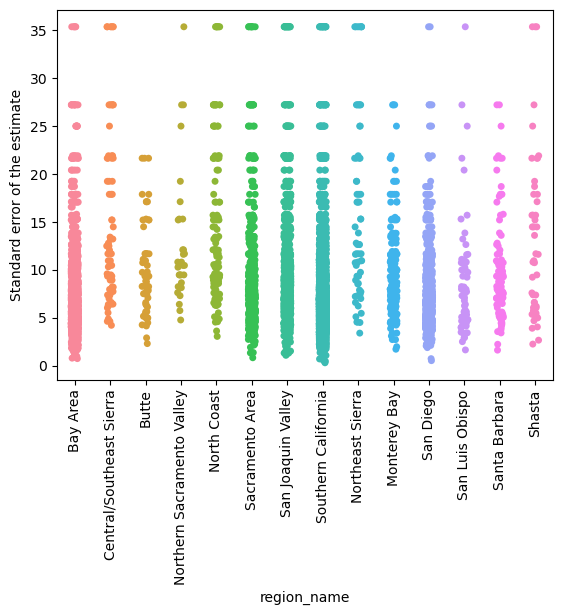

In [43]:
stripplot = sns.stripplot(x=Newmrfei["region_name"], y=Newmrfei["Standard error of the estimate"], jitter=True)

# Rotate the tick labels on the x-axis
stripplot.set_xticklabels(stripplot.get_xticklabels(), rotation=90)

plt.show()

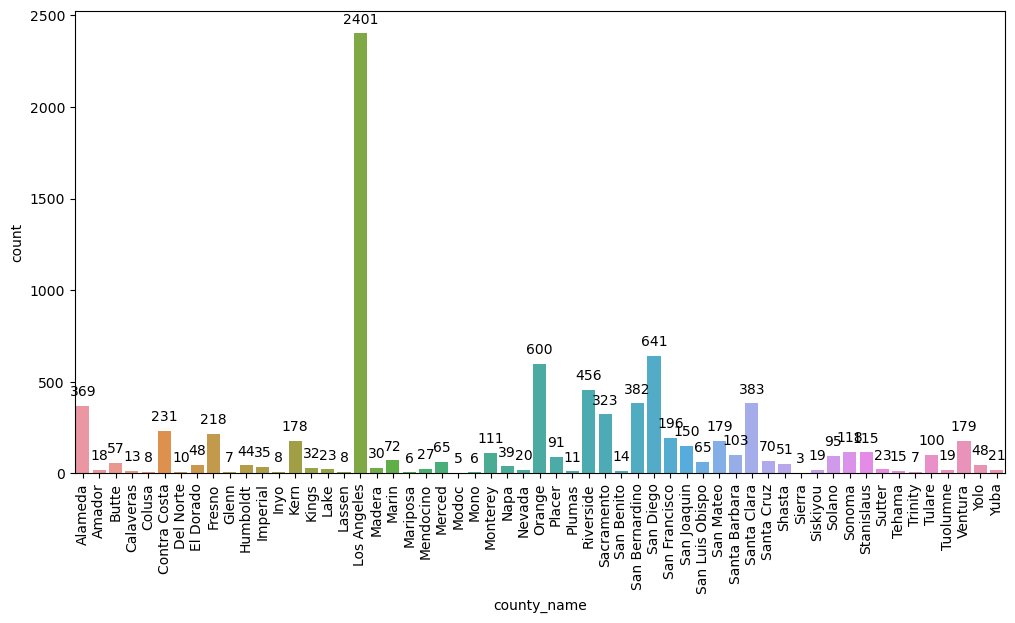

In [44]:
# Set the figure size to expand the length
plt.figure(figsize=(12, 6))  # Adjust the width and height as per your preference

countplot = sns.countplot(x=Newmrfei["county_name"])

# Rotate the tick labels on the x-axis
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=90)

for p in countplot.patches:
    countplot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

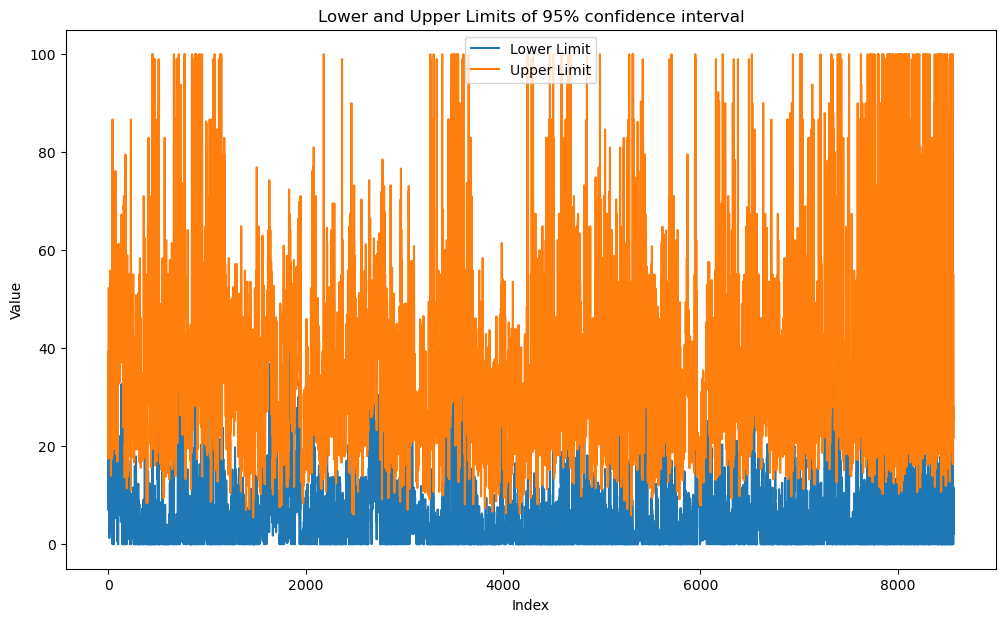

In [45]:
plt.figure(figsize=(12, 7))

# Create the line plot
plt.plot(Newmrfei.index, Newmrfei['Lower limit of 95% confidence interval'], label='Lower Limit')
plt.plot(Newmrfei.index, Newmrfei['Upper limit of 95% confidence interval'], label='Upper Limit')

# Shade the region between the lower and upper limits
plt.fill_between(Newmrfei.index, Newmrfei['Lower limit of 95% confidence interval'], 
                 Newmrfei['Lower limit of 95% confidence interval'], alpha=0.5)

# Set the labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Lower and Upper Limits of 95% confidence interval')

# Show the legend
plt.legend()

# Display the plot
plt.show()